In [5]:
import os
import pandas as pd
from delphes_reader.root_analysis import make_histograms

In [6]:
csv_files=[]
folder_out=os.path.join(os.getcwd(),"..","b_tau_tau_2")
for file in next(os.walk(folder_out))[2]:
    if "hadronic.csv" in file:
        csv_files+=[file]
    else:
        pass 
csv_files.sort()
csv_files

['LQ_LQ_0250_hadronic.csv',
 'LQ_LQ_0500_hadronic.csv',
 'LQ_LQ_0750_hadronic.csv',
 'LQ_LQ_1000_hadronic.csv',
 'LQ_LQ_1250_hadronic.csv',
 'LQ_LQ_1500_btag_hadronic.csv',
 'LQ_LQ_1500_hadronic.csv',
 'LQ_LQ_1750_hadronic.csv',
 'LQ_LQ_2000_hadronic.csv',
 'LQ_LQ_2250_hadronic.csv',
 'LQ_LQ_2500_hadronic.csv',
 'Tau_LQ_1500_btag_hadronic.csv',
 'Tau_LQ_Merged_0250_hadronic.csv',
 'Tau_LQ_Merged_0500_hadronic.csv',
 'Tau_LQ_Merged_0750_hadronic.csv',
 'Tau_LQ_Merged_1000_hadronic.csv',
 'Tau_LQ_Merged_1250_hadronic.csv',
 'Tau_LQ_Merged_1500_btag_hadronic.csv',
 'Tau_LQ_Merged_1500_hadronic.csv',
 'Tau_LQ_Merged_1750_hadronic.csv',
 'Tau_LQ_Merged_2000_hadronic.csv',
 'Tau_LQ_Merged_2250_hadronic.csv',
 'Tau_LQ_Merged_2500_hadronic.csv',
 'stop_hadronic.csv',
 'ttbar_hadronic.csv',
 'w_jets_hadronic.csv',
 'ww_hadronic.csv',
 'wz_hadronic.csv',
 'z_jets_hadronic.csv',
 'zz_hadronic.csv']

In [7]:
def read_csv(file):
    path_to_file=os.path.join(folder_out,file)
    df=pd.read_csv(path_to_file)
    return file.removesuffix('_hadronic.csv'), df

In [8]:
data_dict=dict(map(read_csv,csv_files))
for signal in data_dict:
    print( signal+":" , len(data_dict[signal]) )

LQ_LQ_0250: 20575
LQ_LQ_0500: 17387
LQ_LQ_0750: 17148
LQ_LQ_1000: 17352
LQ_LQ_1250: 17271
LQ_LQ_1500_btag: 16487
LQ_LQ_1500: 17219
LQ_LQ_1750: 16828
LQ_LQ_2000: 16647
LQ_LQ_2250: 16200
LQ_LQ_2500: 15728
Tau_LQ_1500_btag: 26901
Tau_LQ_Merged_0250: 24997
Tau_LQ_Merged_0500: 25562
Tau_LQ_Merged_0750: 24958
Tau_LQ_Merged_1000: 24373
Tau_LQ_Merged_1250: 23326
Tau_LQ_Merged_1500_btag: 28525
Tau_LQ_Merged_1500: 22373
Tau_LQ_Merged_1750: 21878
Tau_LQ_Merged_2000: 20894
Tau_LQ_Merged_2250: 20513
Tau_LQ_Merged_2500: 19816
stop: 640
ttbar: 34457
w_jets: 75
ww: 519
wz: 1147
z_jets: 218
zz: 3214


In [10]:
make_histograms(data_dict["LQ_LQ_0500"],1.0)

No Histogram Dictionary for  j^{bad}_{pt}


{'Pt_{b_{1}}': <cppyy.gbl.TH1F object at 0x559bb1bb5080>,
 '#eta_{b_{1}}': <cppyy.gbl.TH1F object at 0x559bb1a7aa30>,
 '#phi_{b_{1}}': <cppyy.gbl.TH1F object at 0x559bad36c0b0>,
 '#m_{b_{1}}': <cppyy.gbl.TH1F object at 0x559bab48f760>,
 '#Delta R_{b_{1}#tau_{1}}': <cppyy.gbl.TH1F object at 0x559bab351f40>,
 '#Delta#eta_{b_{1}#tau_{1}}': <cppyy.gbl.TH1F object at 0x559bab32ea60>,
 '#Delta#phi_{b_{1}#tau_{1}}': <cppyy.gbl.TH1F object at 0x559bb1bb8b60>,
 '#Delta pt_{b_{1}#tau_{1}}': <cppyy.gbl.TH1F object at 0x559bb0894630>,
 '#Delta #vec{pt}_{b_{1}#tau_{1}}': <cppyy.gbl.TH1F object at 0x559bb1d4f2f0>,
 '#Delta #vec{p}_{b_{1}#tau_{1}}': <cppyy.gbl.TH1F object at 0x559bb1d52d10>,
 '#Delta R_{b_{1}#tau_{2}}': <cppyy.gbl.TH1F object at 0x559bb0a2fdf0>,
 '#Delta#eta_{b_{1}#tau_{2}}': <cppyy.gbl.TH1F object at 0x559bb0a31d80>,
 '#Delta#phi_{b_{1}#tau_{2}}': <cppyy.gbl.TH1F object at 0x559bb1ccfa50>,
 '#Delta pt_{b_{1}#tau_{2}}': <cppyy.gbl.TH1F object at 0x559bb1bdb530>,
 '#Delta #vec{pt}_{b_

No Histogram Dictionary for  j^{bad}_{pt}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


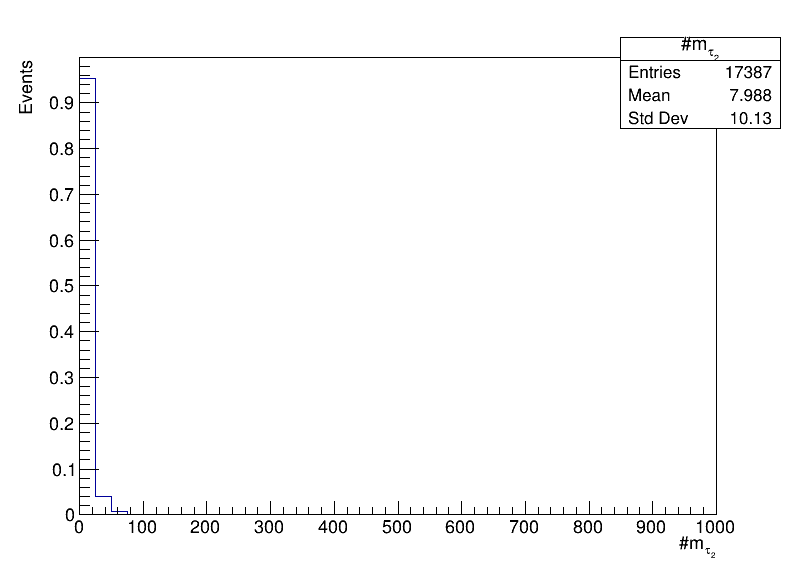

In [12]:
import ROOT
c=ROOT.TCanvas("c1","",800,600)
h=make_histograms(data_dict["LQ_LQ_0500"],1.0)["#m_{#tau_{2}}"]
h.Draw("HIST")
c.Draw()

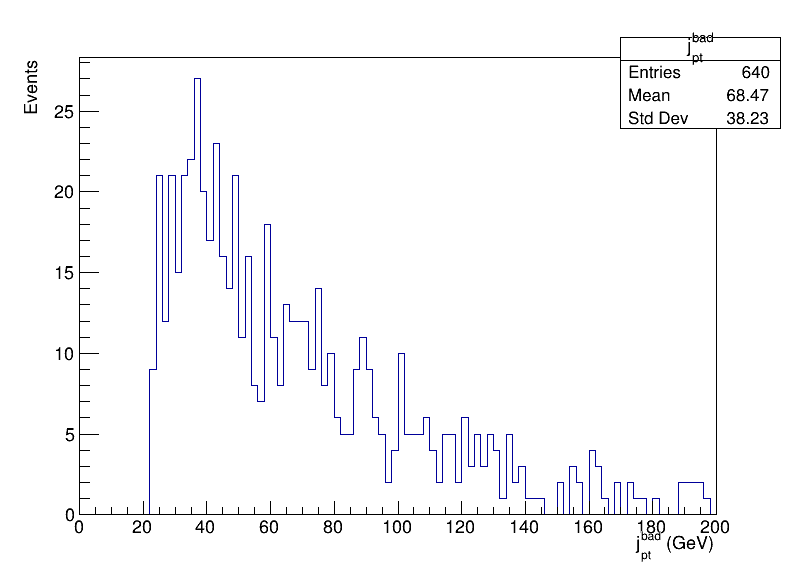

In [13]:
h=ROOT.TH1F(
            "j^{bad}_{pt}",";j^{bad}_{pt} (GeV); Events",
            100,0,200
        )
df=data_dict["stop"]
for value in df["j^{bad}_{pt}"]:
    h.Fill(value)
h.Draw("HIST")
c.Draw()